<a href="https://colab.research.google.com/github/CALDISS-AAU/sdsphd20/blob/master/notebooks/tue24/SDSPhD20_intro-UML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Premable

In [ ]:
# !pip install -qq -U matplotlib
import pandas as pd #Pandas handles tabular data
pd.set_option('display.float_format', lambda x: '%.3f' % x) # turn off scientific notation and too much decimal blah
import matplotlib.pyplot as plt # standard plotting library
import numpy as np #Numpy for linear algebra & co
import seaborn as sns # For pretty dataviz
sns.set_style("darkgrid") # Define style for dataviz

# Introduction to Machine Learning

## General

As with any concept, machine learning may have a slightly different definition, depending on whom you ask. A little compilation of definitions by academics and practioneers alike:

* "Machine Learning at its most basic is the practice of using algorithms to parse data, learn from it, and then make a determination or prediction about something in the world." - Nvidia 
* "Machine learning is the science of getting computers to act without being explicitly programmed." - Stanford
* "Machine learning is based on algorithms that can learn from data without relying on rules-based programming."- McKinsey & Co.
* "Machine learning algorithms can figure out how to perform important tasks by generalizing from examples." - University of Washington
* "The field of Machine Learning seeks to answer the question "How can we build computer systems that automatically improve with experience, and what are the fundamental laws that govern all learning processes?" - Carnegie Mellon University


![](https://www.dropbox.com/s/6mlagf6hfqqw105/random_ai_mask.jpg?dl=1)

## Supervised vs. Unsupervised ML

![](https://sds-aau.github.io/SDS-master/00_media/ml_super_unsuper2.png)

![](https://sds-aau.github.io/SDS-master/00_media//ml_super_unsuper.png)

### Supervised ML

* Concerned with labeling/classification/input-output-mapping/prediction tasks
* Subject of the next lecture, so stay patient

### Unsupervised ML

Tasks related to pattern recognition and data exploration, in dase there yet does not exist a right answer or problem structure. Main applications:

1. **Dimensionality reduction:** Finding patterns in the features of the data
2. **Clustering:** Finding homogenous subgroups within larger group

# Dimensionality Reduction Techniques


## Introduction

Dimensionality reduction techniques are foremost useful to (you might see it coming) reduce the dimensionality of our data. So, what does that mean? And why should we want to do that?

Dimensions here is a synonym for variables, so what we want to really do is have less variables. To do that, we have to find ways to express the same amount of information with fewer, but more information-rich variables. This is particularly useful to:

* Find patterns in the **features** of the data.
* Visualization of **high-dimensional** data.
* **Pre-processing** before supervised ML tasks (complexity & noise reduction).

![](https://sds-aau.github.io/SDS-master/00_media/UML_dimensionality_red_types.png)



# Principal Component Analysis (PCA)



## General

* A popular method is "Principal Component Analysis" (PCA)
* Three goals when finding lower dimensional
representation of features:
     1. Find linear combination of variables to createprincipal components
     2. Maintain most variance in the data
     3. Principal components are uncorrelated (i.e.orthogonal to each other)

## The intuition behind it
I won't go into too much detail with the math, but the basics of PCA are as follows: you take a dataset with many variables, and you simplify that dataset by turning your original variables into a smaller number of "Principal Components".

![](https://sds-aau.github.io/SDS-master/00_media/PCA1.png)



But what are these exactly? Principal Components are the underlying structure in the data. They are the directions where there is the most variance, the directions where the data is most spread out. This means that we try to find the straight line that best spreads the data out when it is projected along it. This is the first principal component, the straight line that shows the most substantial variance in the data.

![](https://sds-aau.github.io/SDS-master/00_media/PCA2.png)

Where many variables correlate with one another, they will all contribute strongly to the same principal component. Each principal component sums up a certain percentage of the total variation in the dataset. Where your initial variables are strongly correlated with one another, you will be able to approximate most of the complexity in your dataset with just a few principal components. Usually, the first principal component captures the main similarity in your data, the second the main difference.

![](https://sds-aau.github.io/SDS-master/00_media/PCA3.png)

These principal components can be computed via **Eigenvalues** and **Eigenvectors**. Just like many things in life, eigenvectors, and eigenvalues come in pairs: every eigenvector has a corresponding eigenvalue. Simply put, an eigenvector is a direction, such as "vertical" or "45 degrees", while an eigenvalue is a number telling you how much variance there is in the data in that direction. The eigenvector with the highest eigenvalue is, therefore, the first principal component. The number of eigenvalues and eigenvectors that exits is equal to the number of dimensions the data set has. Consequently, we can reframe a dataset in terms of these eigenvectors and eigenvalues without changing the underlying information. 

Note that reframing a dataset regarding a set of eigenvalues and eigenvectors does not entail changing the data itself, you're just looking at it from a different angle, which should represent the data better.

## The math behind Eigendecompositions

The eigenvectors and eigenvalues of a covariance (or correlation) matrix represent the "core" of a PCA: The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

In [ ]:
# define a matrix
mat = np.array([[1, 2, 4], [3, 4, 4], [3, 6, 7]])

mat

array([[1, 2, 4],
       [3, 4, 4],
       [3, 6, 7]])

In [ ]:
# center columns by subtracting column means
mat_cent = mat - np.mean(mat.T, axis=1)

In [ ]:
# Compute the covariance matrix
cov_mat = np.cov(mat_cent.T)
print('Covariance matrix by NumPy\n%s' %cov_mat)

Covariance matrix by NumPy
[[1.33333333 2.         1.        ]
 [2.         4.         3.        ]
 [1.         3.         3.        ]]


In [ ]:
# Next, we perform an eigendecomposition on the covariance matrix:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.34238119 -0.6882472   0.63960215]
 [-0.73367398 -0.22941573 -0.63960215]
 [-0.58693919  0.6882472   0.42640143]]

Eigenvalues 
[ 7.33333333e+00  1.00000000e+00 -1.37234766e-16]


By the way, according to some popular tech-media, you are by now AI-Astrophysicians ;)

![](https://sds-aau.github.io/SDS-master/00_media/random_stitchflix_ai.png?dl=1)

## Python Tools

Ok doing that by hand is fun, but for sure `Python` has you covered for more convenience. PCA analysis is like most other classic UML and SML methods integrated in the `scikitlearn` library.

In [ ]:
# Import the functions we need
from sklearn.decomposition import PCA # PCA from  sklearn, the python ML standard library

In [ ]:
# Initialize a model
model = PCA()

In [ ]:
# Fit the model
model.fit(mat)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Access the Eigenvectors (components)
model.components_

array([[ 0.34238119,  0.73367398,  0.58693919],
       [ 0.6882472 ,  0.22941573, -0.6882472 ],
       [-0.63960215,  0.63960215, -0.42640143]])

In [ ]:
# How much variance is explained by the components (Eigenvalue)
model.explained_variance_

array([7.33333333e+00, 1.00000000e+00, 1.09813024e-32])

In [ ]:
# Transform the original data
mat_pca = model.transform(mat)

In [ ]:
mat_pca

array([[-2.51079541e+00, -6.88247202e-01,  5.55111512e-16],
       [-3.58685058e-01,  1.14707867e+00,  1.11022302e-16],
       [ 2.86948046e+00, -4.58831468e-01, -3.33066907e-16]])

## Example

Lets explore this with a bit more of an illustrative example. We will use (sorry) the classical `iris` dataset.

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)



The dataset contains a set of 150 records under 5 attributes 

* Petal Length
* Petal Width
* Sepal Length
* Sepal width
* Class(Species)

This dataset became a typical test case for many statistical techniques in machine learning such as clasification, clustering, and dimensionality reduction.

### Load the data

In [ ]:
# load dataset into Pandas DataFrame
data = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv", #"https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','species'])

### Brief exploration

In the following, we will do some of the standard inspections one should do with every new dataset to get a feeling for its påroperties.

In [ ]:
# Check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
# Print the first 5 rows
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.100,3.500,1.400,0.200,Iris-setosa
1,4.900,3.000,1.400,0.200,Iris-setosa
2,4.700,3.200,1.300,0.200,Iris-setosa
3,4.600,3.100,1.500,0.200,Iris-setosa
4,5.000,3.600,1.400,0.200,Iris-setosa


In [ ]:
# Descriptive statistics
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000,150.000,150.000,150.000
mean,5.843,3.054,3.759,1.199
std,0.828,0.434,1.764,0.763
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


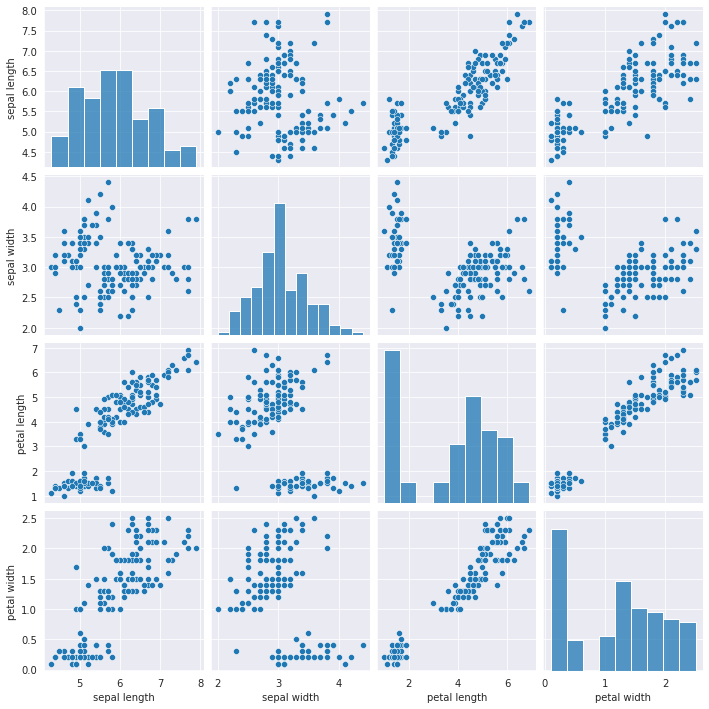

In [ ]:
# Here, one of my very favorite visualizations... save that one.
# Sns pairplot provides a matrix with scatters on the triangles, and the distribution on the diagonal
sns.pairplot(data) # , hue='species'

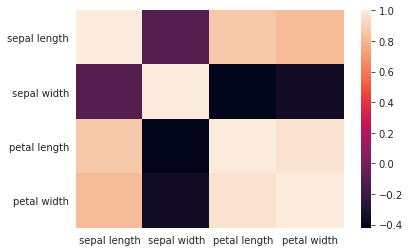

In [ ]:
# And lastly, a correlation plot
sns.heatmap(data.corr())

### Preprocessing

In [ ]:
# Transfer the (categorical) outcome of interest to the index (PCA only works with numerical data)
data.set_index('species', inplace=True)

Since in PCA exercises the features used can be of different scale (eg. meter & kilometer) or dispolay a very different variance, it is common practice in ML workflow to normalize features. By doing so, we prevent features with high variance or scale ranges to dominate.

We here apply a standard scaler, where we substract for every feature its mean, and thyen divide by its standard deviation.

$$StandardScale() = {\frac {X-\mu }{\sigma }}$$

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Let's standard-scale our data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# What are mean and Sd now?
pd.DataFrame(data_scaled, columns=data.columns).describe()

,sepal length,sepal width,petal length,petal width
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,0.000,0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.439,-1.569,-1.444
25%,-0.901,-0.588,-1.228,-1.182
50%,-0.053,-0.125,0.336,0.133
75%,0.675,0.569,0.763,0.791
max,2.492,3.115,1.786,1.711


### Executingh PCA

In [ ]:
# Instantiate a PCA object
model = PCA() # Number of components needs to be defined. We just for illustration take about half of the numbers of features

In [ ]:
# Fitr the model
model.fit(data_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Fit and transform the data
data_reduced = model.transform(data_scaled)

### Inspecting Results

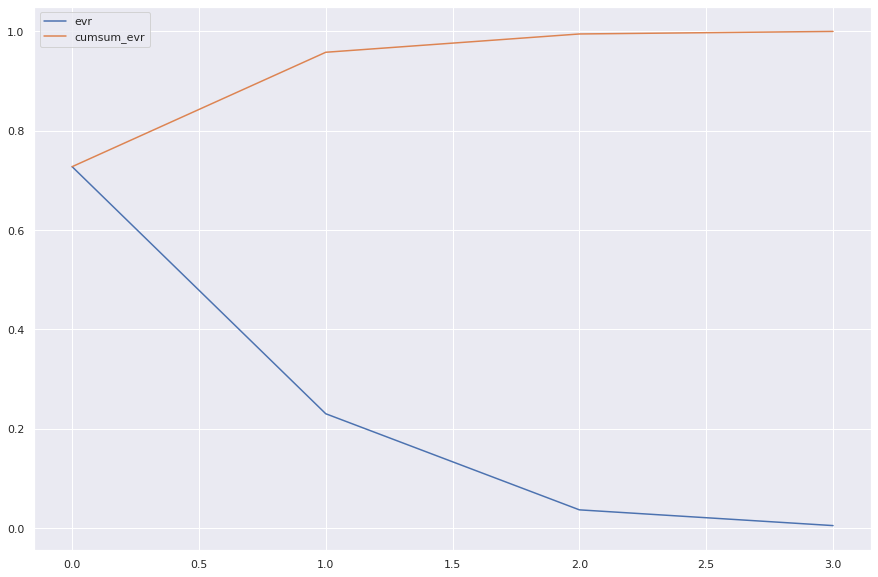

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()
sns.set(rc={'figure.figsize':(15,10)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

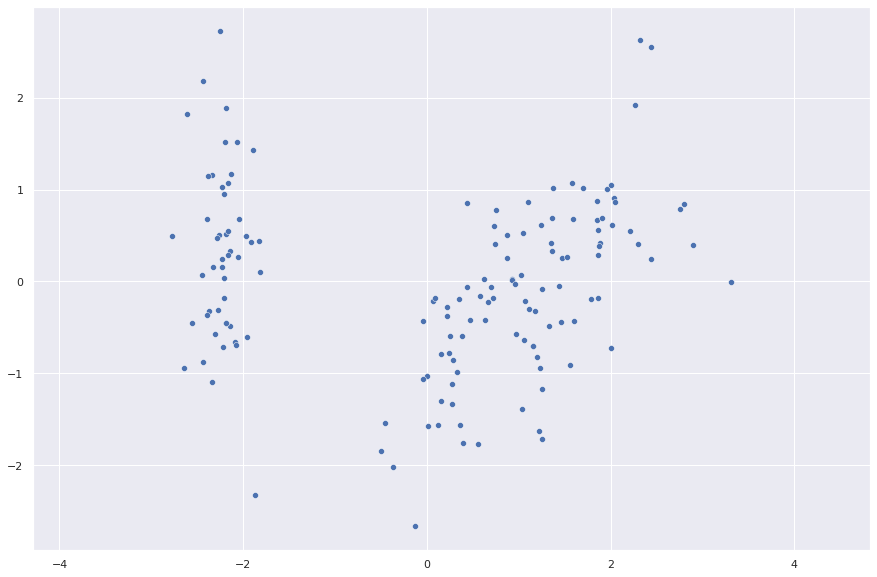

In [ ]:
# Scatter plot of the first 2 componentws
sns.scatterplot(x = data_reduced[:,0], y = data_reduced[:,1])
plt.axis('equal')
plt.show()

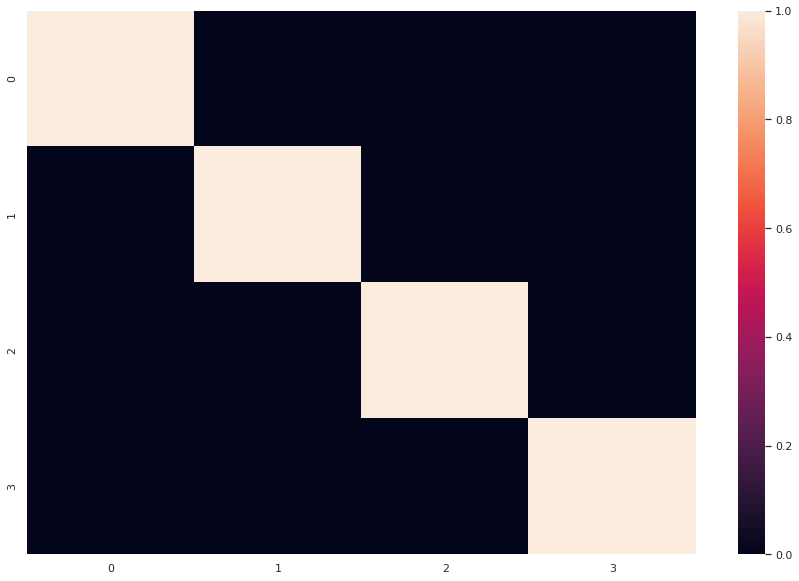

In [ ]:
# Correlation of the components
sns.heatmap(pd.DataFrame(data_reduced).corr())

Lets take a look how these components reorganize the data.

In [ ]:
# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
second_pc = model.components_[1,:]

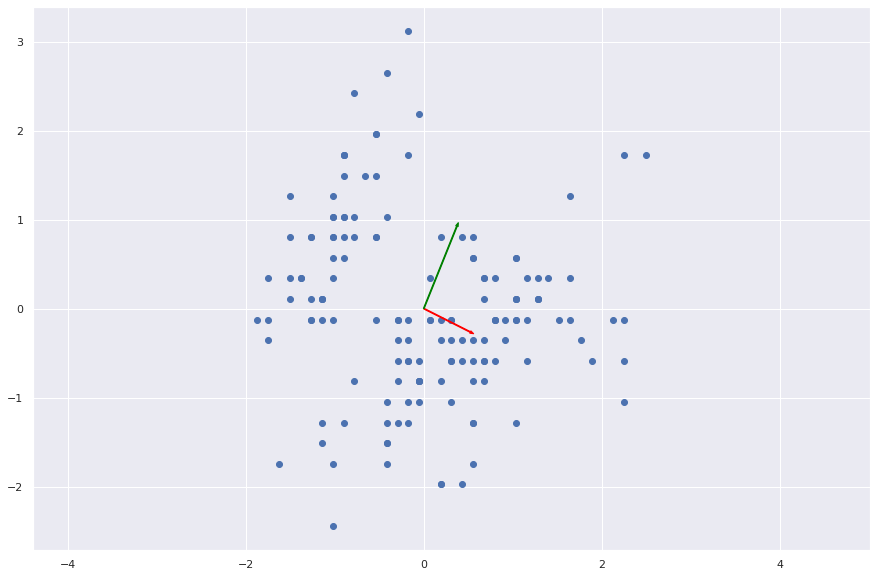

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,0], data_scaled[:,1])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[0], second_pc[1], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

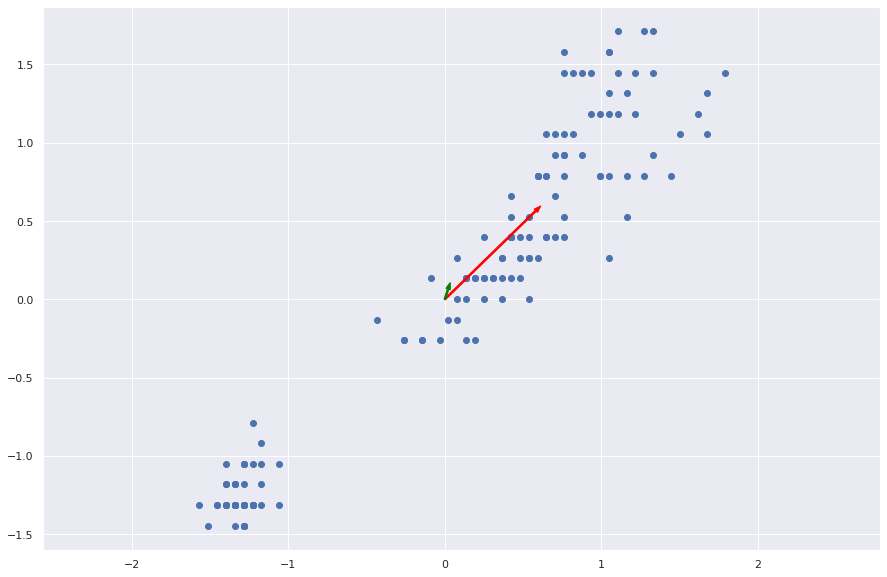

In [ ]:
# Make a scatter plot of the untransformed points
plt.scatter(data_scaled[:,2], data_scaled[:,3])

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[2], first_pc[3], color='red', width=0.01)
plt.arrow(mean[0], mean[1], second_pc[2], second_pc[3], color='green', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

We can also look at the components eigenvectors, which give us the loadings of all features on the components.

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

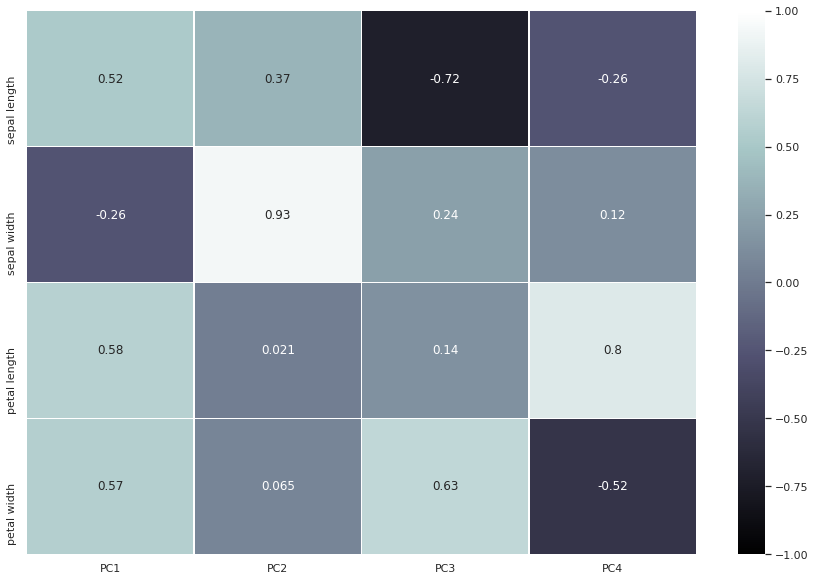

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

# Case study

## Introduction to the case

![](https://blog.hubspot.com/hubfs/digital-nomad-1.jpg)

Allright, lets load some data. Here, we will draw from some own work, where we explore the life of digital nomads. The paper is not written, but the preliminary work is summarized in [this presentation](https://aaudk-my.sharepoint.com/:b:/g/personal/dsh_id_aau_dk/ESeuvplEytZCuNBhKGmA4U8BOGpfbGIbilqTGdgQLA4a6A?e=UGRnvR). 

You probably already know the data from [NomadList](https://nomadlist.com/). Here, we look at the 2017 crawl of city data, which compiles the digital nomads ranking of cities according to a couple of dimensions. Lets take a look. Roman's web-crawl data is always a bit messy, so we do some little cosmetics upfront.

## Loading data 

In [ ]:
# We open the data directly from Github
cities = pd.read_csv('https://github.com/SDS-AAU/SDS-master/raw/master/00_data/nomad_cities.csv', sep='\t')

In [ ]:
# Data structures
cities.info

<bound method DataFrame.info of      Unnamed: 0  coffee_in_cafe  cost_beer  ...  racism  safety  weed
0             0           1.730      1.730  ...   0.400   0.600     0
1             1           0.850      0.850  ...   0.400   0.800     0
2             2           1.990      1.990  ...   0.420   0.800     1
3             3           1.880      1.880  ...   0.000   1.000     0
4             4           5.000      5.000  ...   0.800   0.730     0
..          ...             ...        ...  ...     ...     ...   ...
776         776           4.000      4.000  ...   0.200   0.200     0
777         777           2.000      2.000  ...   0.600   0.200     0
778         778           1.600      1.600  ...   0.400   0.200     1
779         779           5.000      5.000  ...   0.000   0.200     0
780         780           0.000      0.000  ...   0.200   0.200     0

[781 rows x 27 columns]>

In [ ]:
cities.head()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,fragile_states_index,free_wifi_available,freedom_score,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,peace_score,place,places_to_work,press_freedom_index,racism,safety,weed
0,0,1.730,1.730,152.410,1273,1364,1.000,52.7,0.400,0.6,0.600,31,47.498,0.800,0.270,0.860,19.040,1.000,1.000,1.000,0.8,Budapest,1.000,28.17,0.400,0.600,0
1,1,0.850,0.850,98.880,780,777,0.800,78.8,0.600,0.2,0.600,14,18.788,0.620,0.600,0.750,98.993,0.400,0.950,0.950,0.4,Chiang Mai,0.800,44.53,0.400,0.800,0
2,2,1.990,1.990,159.130,1653,1639,1.000,40.8,0.600,0.8,0.800,15,50.076,1.000,0.600,0.830,14.438,1.000,0.940,0.940,0.8,Prague,1.000,16.66,0.420,0.800,1
3,3,1.880,1.880,47.010,1640,1545,1.000,DotMap(__next__=DotMap()),1.000,0.6,0.800,16,25.091,1.000,0.800,0.930,121.560,0.600,0.940,0.940,DotMap(__next__=DotMap()),Taipei,1.000,24.37,0.000,1.000,0
4,4,5.000,5.000,200.000,3309,3028,0.800,34,0.600,0.6,0.800,118,30.267,1.000,0.600,0.950,-97.743,1.000,0.940,0.940,0.8,Austin,1.000,22.49,0.800,0.730,0


In [ ]:
cities.describe()

,Unnamed: 0,coffee_in_cafe,cost_beer,cost_coworking,cost_expat,cost_nomad,female_friendly,free_wifi_available,friendly_to_foreigners,internet_speed,latitude,leisure,lgbt_friendly,life_score,longitude,nightlife,nomadScore,nomad_score,places_to_work,racism,safety,weed
count,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000,781.000
mean,390.000,3.296,3.296,210.360,1880.431,2332.348,0.645,0.561,0.737,13.589,29.521,0.631,0.545,0.700,14.851,0.605,0.649,0.649,0.571,23280176929344430622638080.000,0.678,0.117
std,225.600,1.982,1.982,173.979,1265.411,1117.532,0.247,0.240,0.184,18.199,22.174,0.201,0.244,0.148,77.089,0.234,0.135,0.135,0.220,650596606331366367658246144.000,0.210,0.321
min,0.000,0.000,0.000,0.010,296.000,387.000,0.000,0.000,0.000,0.000,-45.879,0.000,0.180,0.010,-157.858,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,195.000,1.600,1.600,88.960,1010.000,1486.000,0.440,0.400,0.600,2.000,19.991,0.450,0.400,0.620,-63.000,0.400,0.550,0.550,0.400,0.400,0.600,0.000
50%,390.000,3.030,3.030,172.050,1646.000,2209.000,0.600,0.600,0.800,6.000,35.514,0.600,0.600,0.720,14.791,0.600,0.680,0.680,0.400,0.600,0.600,0.000
75%,585.000,4.620,4.620,277.350,2408.000,3056.000,0.800,0.800,0.800,19.000,44.933,0.800,0.800,0.810,77.595,0.800,0.740,0.740,0.800,0.800,0.800,0.000
max,780.000,13.720,13.720,1524.460,13406.000,10121.000,1.000,1.000,1.000,197.000,69.649,1.000,1.000,1.000,174.776,1.000,1.000,1.000,1.000,18181818181818001939777978368.000,1.000,1.000


## Preprocessing

For some reason (data is messy) we have the name of the city as well as longitude/langitude but we don't have the country or region names.
Let's try to fix that.

One approach could be based on the lon/lat values, as city names may non-unique.

For this we need to start by "looking up" the country name for each specific coordinate

We can use an offline reverse geocoder package for that.

In [ ]:
#Load and instantiate the reversegeocoder
!pip install reverse-geocode
import reverse_geocode

     |████████████████████████████████| 1.6MB 7.5MB/s 
  Created wheel for reverse-geocode: filename=reverse_geocode-1.4.1-cp37-none-any.whl size=1637842 sha256=7f807ba9711adf372d9a113b35ac4353d510fb12f71883ec2f418a9ee9ea7155
  Stored in directory: /root/.cache/pip/wheels/bb/20/42/0f783ab28c022f828cb35756d3c9606bb20c560f1535a0b758
Successfully built reverse-geocode


In [ ]:
# That's how it works
coordinates = [(56.457, 10.039)]
location = reverse_geocode.search(coordinates)
location

[{'city': 'Randers', 'country': 'Denmark', 'country_code': 'DK'}]

In [ ]:
location = location[0]

In [ ]:
# Let's see what we get
print(location['city'])
print(location['country'])
print(location['country_code'])

Randers
Denmark
DK


In [ ]:
# A smart way to get all geocoding done in one line
cities['countrycode'] = cities.apply(lambda t: reverse_geocode.search([(t['latitude'],t['longitude'])])[0]['country_code'], axis=1)

In [ ]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              781 non-null    int64  
 1   coffee_in_cafe          781 non-null    float64
 2   cost_beer               781 non-null    float64
 3   cost_coworking          781 non-null    float64
 4   cost_expat              781 non-null    int64  
 5   cost_nomad              781 non-null    int64  
 6   female_friendly         781 non-null    float64
 7   fragile_states_index    781 non-null    object 
 8   free_wifi_available     781 non-null    float64
 9   freedom_score           781 non-null    object 
 10  friendly_to_foreigners  781 non-null    float64
 11  internet_speed          781 non-null    int64  
 12  latitude                781 non-null    float64
 13  leisure                 781 non-null    float64
 14  lgbt_friendly           781 non-null    fl

in the above cell we apply the 


```
rg.nearest(t['latitude'],t['longitude']).cc
```

function to each row t of the dataframe cities


```
lambda t:
```

is a rather scary syntactic way of calling an anonymous function

Basically, we could say:


*   For each row of the cities dataframe
*   take the value of the longitude and latitude columns
*   look up the corresponding place
*   write the country code "cc" into a new column "alpha-2"

Now that we have exact country codes for each city, we need to find the regions these countries belong to

Luckily it's easy to find tables listing this information on the internet.

In [ ]:
# Download a recent country info table
c = pd.read_csv('https://github.com/SDS-AAU/SDS-master/raw/master/00_data/countrylist.csv')

In [ ]:
c.head()

In [ ]:
 # Merge this lookup table with our initial cities list
cities = cities.merge(c, left_on='countrycode', right_on='alpha_2')

In [ ]:
# Let's select interesting variables for the analysis
vars_analysis = ["cost_nomad", "cost_coworking", "cost_expat", "coffee_in_cafe", "cost_beer", # costs
          "places_to_work", "free_wifi_available", "internet_speed", # work
          "freedom_score", "peace_score", "safety", "fragile_states_index", "press_freedom_index", # safety & freedom
          "female_friendly", "lgbt_friendly", "friendly_to_foreigners", "racism", # friendly
          "leisure","life_score","nightlife","weed"] # fun 

vars_descr = ["nomad_score", "cost_nomad", "places_to_work", "freedom_score", "friendly_to_foreigners", "life_score"]

In [ ]:
# And use the selection to only extract these variables into a new object
data = cities[vars_analysis]
descr = cities[vars_descr]

In [ ]:
# Quick check
data.info()

We can see some strange things going with the data types. Some are floats or ints as we would expect but others are objects

In [ ]:
print(data['peace_score'].unique())

In [ ]:
print(data['freedom_score'].unique())

In [ ]:
print(data['fragile_states_index'].unique())

In [ ]:
print(data['press_freedom_index'].unique())

This is a problem that probably has something to do with the scraping process. Let's try to turn everything into floats and if we can't we just put in a missing value statement

In [ ]:
# This function will fo exactly that
def floater(x):
  try: #Try to
    return float(x) #Turn X into a floating point number
  except ValueError: #In case a ValueError occurs
    return np.nan #Turn X into np.nan (missing value placeholder)

In [ ]:
# map applies the defined function to every observation
data.loc[:,'peace_score'] = data['peace_score'].map(floater)
data.loc[:,'freedom_score'] = data['freedom_score'].map(floater)
data.loc[:,'fragile_states_index'] = data['fragile_states_index'].map(floater)
data.loc[:,'press_freedom_index'] = data['press_freedom_index'].map(floater)

In [ ]:
# yup, some missing data...
data.isnull().sum()

Now we are facing a new problem - Missing Data. While it would be easier to just kick out these cities, we will try to do better and impute.

Read up on imputation in the documentation of the package: https://github.com/iskandr/fancyimpute
also here: https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

There are many other packages and modules that perform imputation. I found facyimpute the least problematic so far

In [ ]:
# Import the imputation package
from fancyimpute import SoftImpute, SimpleFill

In [ ]:
# Easy version: Just replace missing values by the mean of the column
data_imp = SimpleFill(fill_method='mean').fit_transform(data)

In [ ]:
# We can have a quick look
pd.DataFrame(data_imp, columns=data.columns).head()

In [ ]:
# Or, we go crazy and use a neural network powered method
data_imp = SoftImpute().fit_transform(data)

Ok, by now our data is pretty much in the shape we want it to be. No missing values, all features are numeric.

The last thing to do is to standardize the values.

In [ ]:
# Let's standard-scale our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_imp)

As you can see, now our data has a mean of 0 and a standard deviation of one.

In [ ]:
pd.DataFrame(data_scaled, columns=data.columns).describe()

## Executing the PCA

In [ ]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=7) #We pick 7 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
data_reduced = model.fit_transform(data_scaled)

In [ ]:
# Make sure the data shape is as it should be
data_reduced.shape

In [ ]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

In [ ]:
# Is 7 components really a good choice?
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [ ]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

In [ ]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [ ]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

In [ ]:
# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

We can certainly make things much more fancy. However, as you can see, that will require more work.

We can use `Bokeh` for an interactive visualisation.

In [ ]:
import altair as alt

In [ ]:
# Define the data that we are going to use as a dataframe
d = pd.DataFrame({'y': data_reduced[:,1],
                 'x': data_reduced[:,0], 
                 'place': cities.place, 
                 'country': cities['alpha_2'],
                 'region': cities['region']})

In [ ]:
alt.Chart(d).mark_point().encode(
    x='x',
    y='y',
    color='region',
    tooltip=['place', 'country', 'region']
).interactive()

Lastly, lets summarize the characteristics of the data by the different coordinates of component 1 and 2, in 4 categories.

In [ ]:
data['quadrant'] = 0

In [ ]:
q1 = data[(d['x'] < 0) & (d['y'] < 0)].index
q2 = data[(d['x'] < 0) & (d['y'] >= 0)].index
q3 = data[(d['x'] >= 0) & (d['y'] < 0)].index
q4 = data[(d['x'] >= 0) & (d['y'] >= 0)].index

In [ ]:
data['quadrant'][q1] = 1
data['quadrant'][q2] = 2
data['quadrant'][q3] = 3
data['quadrant'][q4] = 4

In [ ]:
data.groupby(['quadrant']).mean()